In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

%matplotlib inline
import matplotlib.pyplot as plt
import cv2

from coco_vis_utils import *

In [9]:
def generate_bbox(img_ann):
    tmp_bbox = []
    for aa in img_ann:
        tbox = aa['bbox']
        tmpbox = [round(x) for x in tbox]
        #print(tmpbox)
        tmp_bbox.append(tmpbox)
        
    return tmp_bbox

# Create the Training and Validation Datasets
Make sure you download the training dataset linked at the top of this notebook. If you put the dataset somewhere else, update the paths below.

In [12]:
DATASET_ROOT = "/mnt/omreast_users/phhale/csiro_trashnet/original_samples/"
#os.listdir(DATASET_ROOT)

In [13]:
dataset_train = CocoLikeDataset()
dataset_train.load_data(os.path.join(DATASET_ROOT, 'Subset_Trashnet/subset_Trashnet.json'),
                        os.path.join(DATASET_ROOT, 'Subset_Trashnet'))
dataset_train.prepare()

In [14]:
print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 203
Class Count: 37
  0. BG                                                
  1. R_footwear                                        
  2. H_lid                                             
  3. H_unknown/other                                   
  4. S_packaging                                       
  5. S_label                                           
  6. M_aerosol                                         
  7. S_otherbag                                        
  8. H_plate/bowl                                      
  9. M_foodcan/tin                                     
 10. S_thinfilmbag                                     
 11. S_straw                                           
 12. M_beveragecan                                     
 13. H_packaging                                       
 14. P_foodcontainer                                   
 15. P_cardboard                                       
 16. S_cup                                             
 17. H_utensil 

In [6]:
# Load and display random samples
num_samples = 12
image_ids = np.random.choice(dataset_train.image_ids, num_samples)

img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

[136  18  99 155   2  97  30 198   0 149  73   8]


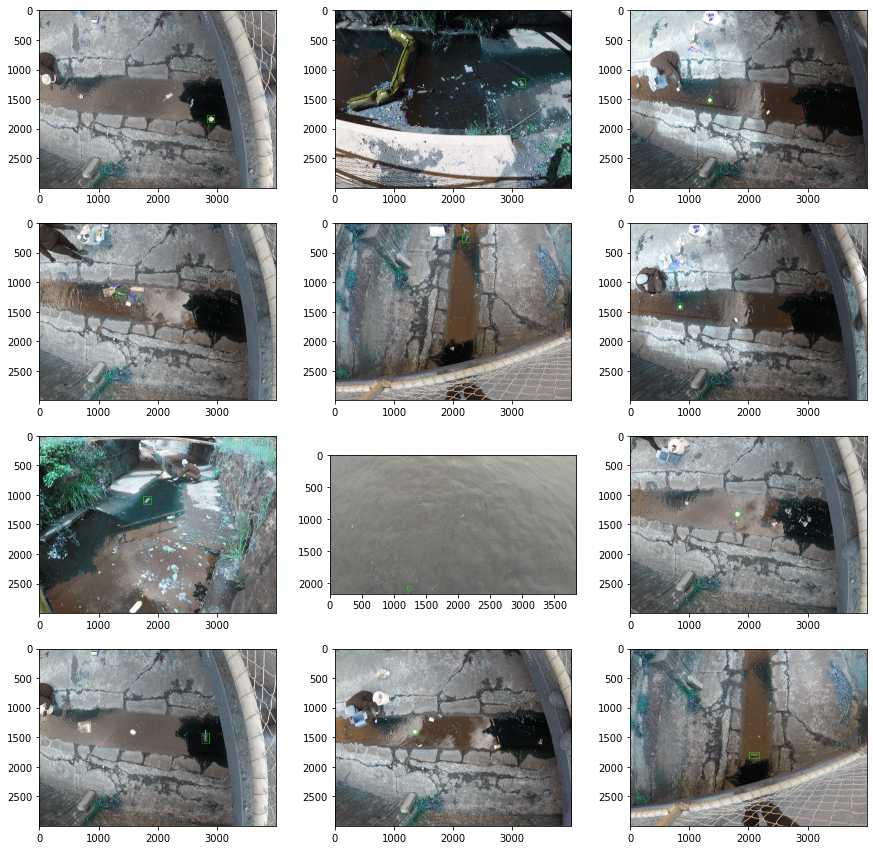

In [7]:
plt.figure(figsize=(15, 15))
#for i in range(len(image_pathss)):
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)

In [ ]:
# Load and display random samples
#image_ids = np.random.choice(dataset.image_ids, 4)
num_samples = 10
image_ids = np.random.choice(dataset_train.image_ids, num_samples)

img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

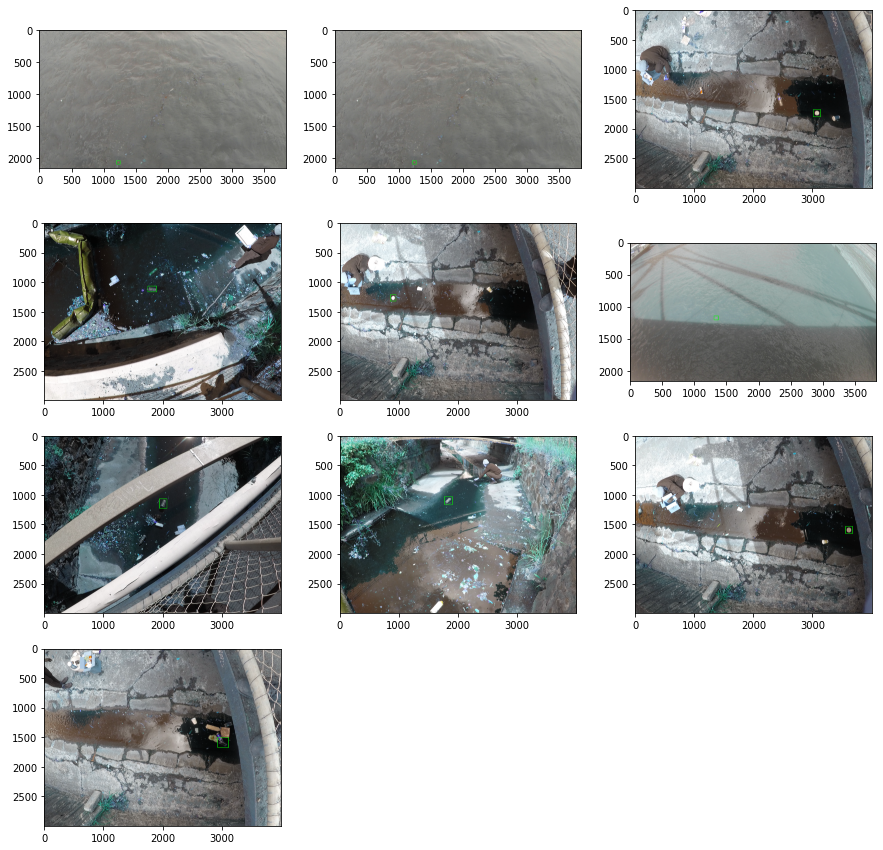

In [35]:
plt.figure(figsize=(15, 15))
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)

In [10]:
num_samples = 10
image_ids = np.random.choice(dataset_train.image_ids, num_samples)
img_info = []
for image_id in image_ids:
    img_info.append(dataset_train.__dict__['image_info'][image_id])
    
#print(image_pathss)
print(image_ids)

[147  12  40 147  58 164 160 155  14  13]


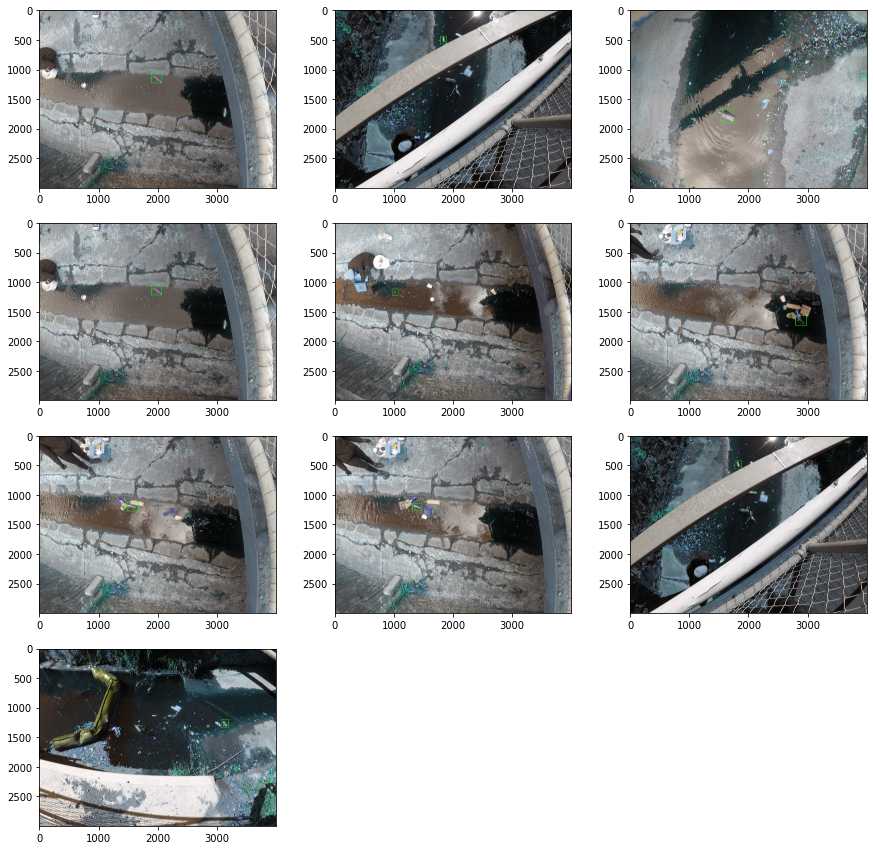

In [11]:
plt.figure(figsize=(15, 15))
for i in range(len(img_info)):
    plt.subplot(4, 3, i+1)
    img = cv2.imread(img_info[i]['path'])
    tmp_bbox = generate_bbox(img_info[i]['annotations'])
    [cv2.rectangle(img,(x, y), (x + w, y + h), (0,255,0), thickness=5) for x, y, w, h in tmp_bbox]   # draw a rectangle.
    plt.imshow(img)